### Objetivo 1: Análise exploratória de dados (Python)

Além dos dados recuperados nas tarefas anteriores, você recebeu um segundo arquivo. Agora você tem estes dois CSVs:

/datasets/project_sql_result_01.csv. contém os seguintes dados:

contém os seguintes dados:

trips_amount: o número de corridas para cada empresa de táxi de 15 a 16 de novembro de 2017.

/datasets/project_sql_result_04.csv. contém os seguintes dados:

dropoff_location_name: bairros de Chicago onde as corridas terminaram

average_trips: o número médio de viagens que terminaram em cada bairro em novembro de 2017.

Para esses dois conjuntos de dados, agora você precisa

importar os arquivos
estudar os dados que eles contêm
verificar se os tipos de dados estão corretos
identificar os 10 principais bairros em termos de destinos
fazer gráficos: empresas de táxi e número de corridas, top 10 bairros por número de corridas em que esse bairro é destino
tirar conclusões com base em cada gráfico e explicar os resultados

#### Passo 5. Testando hipóteses (Python)

/datasets/project_sql_result_07.csv — o resultado da última consulta. Ele contém dados sobre viagens do Loop para o Aeroporto Internacional O'Hare. Lembre-se, estes são os valores dos campos da tabela:

start_ts
data e hora de coleta
weather_conditions
condições meteorológicas no momento em que a corrida começou
duration_seconds
duração da corrida em segundos
Teste a hipótese:

"A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos." 

Decida onde definir o nível de significância (alfa) por conta própria.

Explique:

como você formou as hipóteses nula e alternativa
qual critério você usou para testar a hipótese e porque

In [2]:
# Análise Exploratória 

#importar as bibliotecas

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
import random

In [3]:
#recuperar CSV:
trips_amount_df = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_location_df = pd.read_csv('/datasets/project_sql_result_04.csv')
#obtendo informações sobre os data frames:
trips_amount_df.info()
print()
dropoff_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [4]:
print(trips_amount_df.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [5]:
print(dropoff_location_df.head())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [6]:
trips_amount_df.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [7]:
dropoff_location_df.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


#### Resposta do aluno: A princípio, sem dados nulos

In [8]:
### verificando os 10 principais bairros em termos de destinos

neighborhood_dropoff = dropoff_location_df.groupby('dropoff_location_name')['average_trips'].sum().sort_values(ascending=False)
print(neighborhood_dropoff.head(10))


dropoff_location_name
Loop                  10727.466667
River North            9523.666667
Streeterville          6664.666667
West Loop              5163.666667
O'Hare                 2546.900000
Lake View              2420.966667
Grant Park             2068.533333
Museum Campus          1510.000000
Gold Coast             1364.233333
Sheffield & DePaul     1259.766667
Name: average_trips, dtype: float64


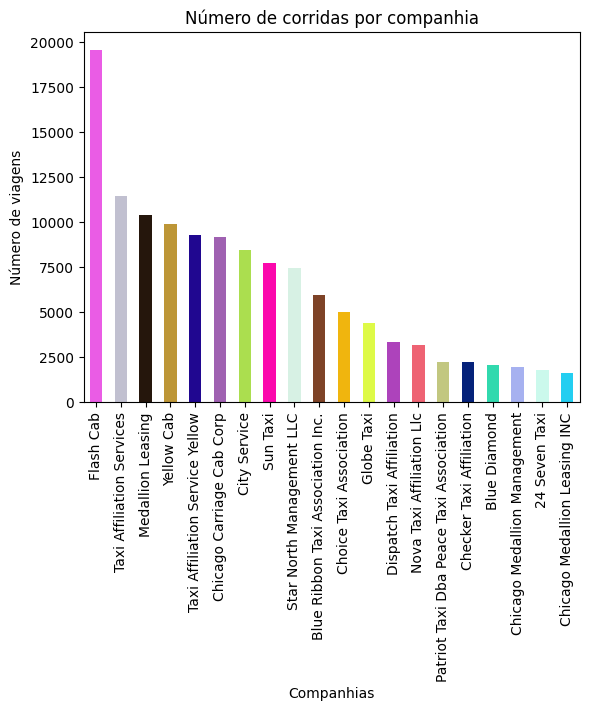

In [9]:
### Criando gráficos da tabela trips

company_trips = trips_amount_df.groupby('company_name')['trips_amount'].sum()
limit_min = 1000 #definindo um limite minimo de corridas, valores abaixo desse limite são irrelevantes. 
company_trips = company_trips[company_trips > limit_min]
colors = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in range(len(company_trips))]
company_trips.nlargest(20).plot(kind = 'bar', title='Número de corridas por companhia', xlabel= 'Companhias', ylabel= 'Número de viagens', color=colors)
plt.show()

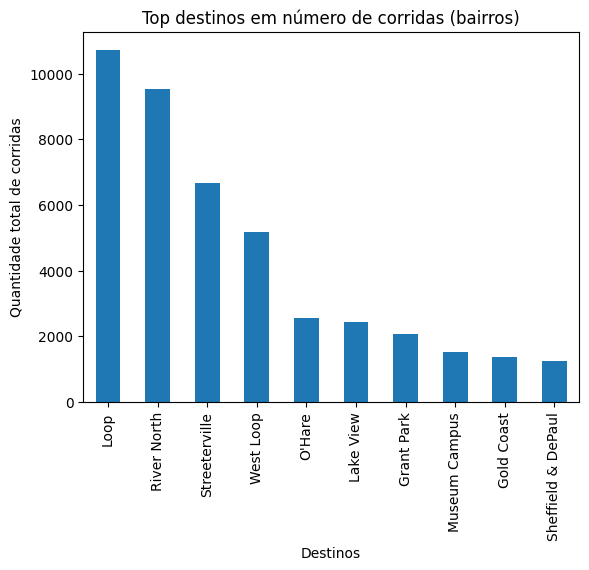

In [10]:
# bairros por número de corridas (destinos)

neighborhood_dropoff.nlargest(10).plot(kind='bar', title='Top destinos em número de corridas (bairros)', ylabel='Quantidade total de corridas', xlabel='Destinos')
plt.show()


#### Resposta do aluno:
##### Como podemos ver, temos alguns bairros mais requisitados do que outros, é uma informação váliosa para uma eventual campanha, ou extratégia de precificação.
##### já o gráfico das companhias, é interessante para estudarmos qual é a abordagem que as companhias com mais corridas tem em relação as demais, se tem algum forte apelo publicitário, segurança, preços, disponibilidade, etc... o ideal seria realizar uma analise SWOT , para obter um raciocionio mais completo sobre esse aspecto.

In [11]:
#### teste de hipóteses
## lendo ultimo CSV
start_df = pd.read_csv('/datasets/project_sql_result_07.csv')

start_df.info()
print()
print(start_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [12]:
# Teste de Hipostese "A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos. "
# levando em consideração que os dados do DF já são as viagens de Loop à O'hare, 
# vamos direto ao filtro e postriormente ao teste de hipotese:

print(start_df['weather_conditions'].value_counts())

# convertendo valores
start_df['start_ts'] = pd.to_datetime(start_df['start_ts'])

# Criando um filtro para identificar sábados com a seguinte formula (dayofweek = 5) e condição climática 'Bad'
saturdays_bad = (start_df['start_ts'].dt.dayofweek == 5) & (start_df['weather_conditions'] == 'Bad')
saturdays_good = (start_df['start_ts'].dt.dayofweek == 5) & (start_df['weather_conditions'] == 'Good')

# Extraindo as corridas que ocorreram em sábados com clima ruim e bom para comparar a média
saturday_bad_weather = start_df[saturdays_bad] 
saturday_good_weather = start_df[saturdays_good]

print(saturday_bad_weather)
print()
print(saturday_good_weather)

Good    888
Bad     180
Name: weather_conditions, dtype: int64
                start_ts weather_conditions  duration_seconds
6    2017-11-04 16:00:00                Bad            2969.0
30   2017-11-18 12:00:00                Bad            1980.0
34   2017-11-04 17:00:00                Bad            2460.0
51   2017-11-04 16:00:00                Bad            2760.0
52   2017-11-18 12:00:00                Bad            2460.0
...                  ...                ...               ...
1031 2017-11-18 12:00:00                Bad            2560.0
1032 2017-11-18 10:00:00                Bad            1908.0
1053 2017-11-18 12:00:00                Bad            2400.0
1061 2017-11-18 16:00:00                Bad            2186.0
1067 2017-11-04 16:00:00                Bad            2834.0

[180 rows x 3 columns]

                start_ts weather_conditions  duration_seconds
0    2017-11-25 16:00:00               Good            2410.0
1    2017-11-25 14:00:00               Good 

In [13]:
### 2 passo: testar hipótese
good = saturday_good_weather['duration_seconds']
bad = saturday_bad_weather['duration_seconds']

print(good)
print()
print(bad)

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64


In [14]:
# Verificando as variâncias, das populações good(tempo bom) e bad(tempo ruim)

print(good.var())
print()
print(bad.var())

576382.009689509

520294.086002483


##### podemos notar que as variâncias são diferentes, ou seja, será utilizado 'equal_var=False' no teste de hipotese

In [15]:
# Agora vou testar a hipoteses:

# 1) Hipotese Alternativa: A duração média das corridas aos sabados chuvosos muda. 
# 2) Hipotese Nula, a duração média das corridas não muda nós dias ruins.

#definir limiar alpha em 0.05 pois é um limiar razoavél para evitar erros de hipótese

good # Corridas nos sábados com clima bom
bad # Corridas nos sábados com clima ruim

alpha = 0.05

#teste de hipotese de 2 populações
results = st.ttest_ind(good, bad, equal_var= False)
print('valor-p:', results.pvalue)
if results.pvalue < alpha:
    print("Rejeitamos a Hipotese Nula (as médias são diferentes)")
else:
    print("Não podemos rejeitar a Hipotese Nula (ambas as médias são iguais independente do clima)")

valor-p: 6.738994326108734e-12
Rejeitamos a Hipotese Nula (as médias são diferentes)


In [16]:
print(good.mean())
print()
print(bad.mean())

1999.6756756756756

2427.2055555555557


#### Conclusão:

#### Realizei apenas um comparativo, para reforçar o teste estatístico, como podemos ver, por mais que a quantidade de corridas nos dias ruins sejam bem menores do que nos dias bons, a média de duração das corridas nos sábados é bem maior do que a média nos dias bons.